In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report ,precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import random
from IPython import display

np.random.seed(0)

## **Data set create and Visual Representation**

<ipython-input-76-d70cf3c125b6>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(x[:,0],x[:,1], c=y,cmap=plt.cm.get_cmap('plasma',nc), marker='o', s=5)


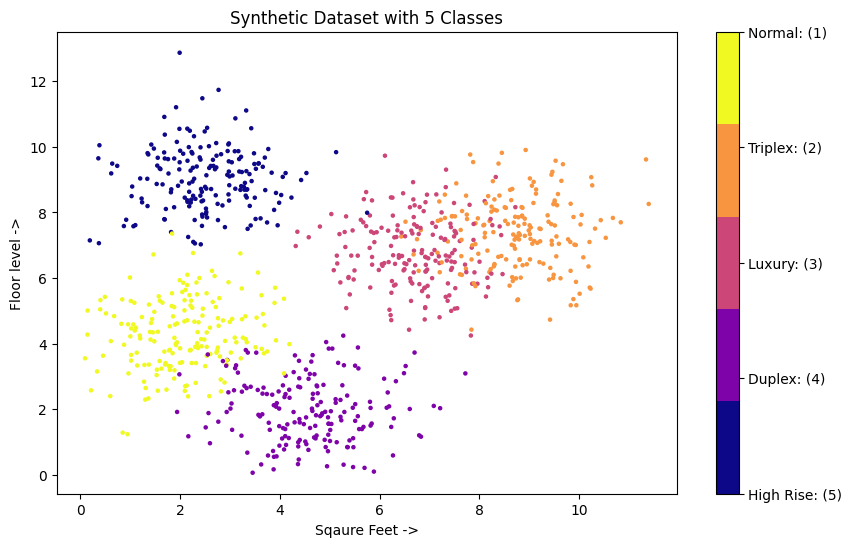

In [76]:
ns = 900
nf = 2
nc = 5
rs = 42

x,y = make_blobs(n_samples=ns,n_features=nf, centers=nc, random_state=rs)
x = abs(x)
y = abs(y)

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

classNames = ['Normal: (1)','Triplex: (2)','Luxury: (3)','Duplex: (4)','High Rise: (5)']
plt.figure(figsize=(10,6))
scatter = plt.scatter(x[:,0],x[:,1], c=y,cmap=plt.cm.get_cmap('plasma',nc), marker='o', s=5)
#plt.xlim(1, 200)
#plt.ylim(1, 30)
cbar = plt.colorbar(scatter, ticks=range(nc))
cbar.set_ticklabels(classNames[::-1])
plt.title('Synthetic Dataset with 5 Classes')
plt.xlabel('Sqaure Feet ->')
plt.ylabel('Floor level ->')

plt.show()

In [77]:
x_train

array([[8.40515236, 7.57201766],
       [2.31013793, 8.41406925],
       [7.45080618, 6.30752681],
       ...,
       [1.83940379, 5.53632798],
       [8.24357341, 8.17693847],
       [5.12088807, 2.19705371]])

In [79]:
y_train

array([2, 0, 2, 4, 1, 1, 0, 3, 0, 4, 3, 4, 0, 3, 3, 4, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 1, 4, 2, 0, 2, 1, 1, 1, 4, 2, 1, 2, 4, 0, 4, 3, 0,
       1, 1, 4, 0, 2, 3, 2, 1, 0, 3, 4, 4, 4, 0, 1, 2, 1, 2, 4, 1, 3, 2,
       2, 1, 1, 2, 1, 1, 0, 0, 1, 4, 3, 0, 3, 3, 4, 2, 1, 2, 4, 3, 3, 1,
       3, 2, 1, 2, 3, 4, 3, 4, 3, 3, 2, 2, 2, 4, 1, 0, 4, 4, 1, 3, 3, 0,
       2, 4, 3, 0, 1, 0, 4, 1, 1, 0, 3, 3, 0, 3, 3, 4, 2, 0, 3, 2, 4, 1,
       4, 1, 1, 0, 0, 3, 1, 4, 1, 0, 4, 1, 4, 1, 4, 1, 1, 0, 4, 2, 1, 1,
       1, 4, 2, 4, 4, 0, 0, 0, 0, 4, 0, 4, 3, 0, 1, 0, 0, 3, 3, 2, 3, 4,
       4, 4, 2, 0, 2, 4, 3, 1, 2, 0, 1, 3, 3, 1, 0, 0, 4, 1, 0, 0, 1, 4,
       2, 2, 2, 2, 4, 4, 2, 0, 0, 0, 1, 3, 4, 1, 2, 4, 1, 2, 2, 1, 3, 0,
       3, 0, 3, 2, 0, 2, 3, 0, 3, 2, 0, 1, 1, 3, 0, 3, 3, 2, 0, 2, 3, 3,
       0, 2, 3, 4, 2, 2, 3, 2, 4, 3, 0, 3, 2, 4, 1, 4, 2, 0, 2, 3, 3, 2,
       4, 4, 4, 4, 4, 2, 1, 1, 4, 4, 2, 0, 3, 3, 1, 0, 0, 0, 4, 4, 4, 4,
       1, 3, 3, 4, 4, 2, 3, 1, 0, 1, 0, 0, 4, 3, 2,

In [80]:
x_test

array([[ 1.6875249 ,  3.75780309],
       [ 4.370472  ,  2.69071194],
       [ 2.62484591,  8.71318243],
       [ 6.91431208,  6.64589486],
       [ 7.82902608,  4.24772753],
       [ 9.20328049,  6.48431325],
       [ 4.18981336,  2.59601962],
       [ 4.15227261,  1.5406115 ],
       [ 5.56605638,  3.88258632],
       [ 9.54031944,  6.660622  ],
       [ 3.33540934,  2.64284223],
       [ 2.60193341,  4.48724787],
       [ 2.18503127,  8.88414307],
       [ 6.68310602,  6.17110584],
       [ 4.60224413,  3.07647157],
       [ 6.25781723,  8.45033431],
       [ 5.12894273,  9.83618863],
       [ 5.68458056,  8.4032965 ],
       [ 6.10792848,  9.72865221],
       [ 1.03130358,  8.49601591],
       [ 8.85796556,  7.87601287],
       [ 8.90992902,  7.28630068],
       [ 2.82446687,  9.77325535],
       [ 3.69220474,  4.55612309],
       [ 2.21612515,  8.29993471],
       [ 2.54502366, 10.57892978],
       [ 4.68840046,  1.14221957],
       [ 3.35944948,  3.72796387],
       [ 7.08563082,

In [81]:
y_test

array([4, 1, 0, 2, 2, 3, 1, 1, 1, 3, 1, 4, 0, 2, 1, 2, 0, 2, 2, 0, 3, 3,
       0, 4, 0, 0, 1, 1, 1, 3, 0, 1, 0, 4, 0, 0, 3, 1, 2, 2, 1, 4, 0, 1,
       2, 1, 2, 0, 3, 2, 1, 1, 1, 0, 4, 1, 4, 4, 4, 2, 0, 2, 0, 3, 2, 3,
       2, 1, 1, 1, 3, 3, 3, 2, 2, 3, 3, 1, 2, 0, 0, 4, 0, 1, 2, 4, 3, 0,
       1, 0, 1, 4, 0, 0, 3, 3, 2, 1, 1, 3, 3, 2, 4, 2, 3, 1, 4, 2, 4, 4,
       3, 3, 2, 3, 0, 0, 0, 2, 2, 2, 3, 4, 4, 0, 2, 2, 4, 4, 2, 4, 4, 0,
       4, 3, 3, 0, 0, 2, 2, 0, 2, 2, 3, 0, 4, 1, 0, 2, 2, 0, 2, 4, 4, 0,
       4, 2, 1, 3, 0, 2, 4, 2, 3, 1, 0, 4, 1, 1, 0, 4, 0, 3, 0, 0, 2, 1,
       0, 0, 1, 4])

In [82]:
print("Shapes of Each Data :")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Shapes of Each Data :
(720, 2)
(720,)
(180, 2)
(180,)


## **Neural Network with Sigmoid and Softmax Activation Function**

In [104]:
class NeuralNetwork(object):
    def __init__(self,hLN1 = 20, hLN2 = 20,hLN3 = 20,lr=0.01) :
        iLn = 2



        oLn = nc
        self.eta = lr

        self.wHL1 = np.random.randn(iLn,hLN1)
        self.wHL2 = np.random.randn(hLN1,hLN2)
        self.wHL3 = np.random.randn(hLN2,hLN3)
        self.WO = np.random.randn(hLN3,oLn)

        self.b1 = np.zeros((1,hLN1))
        self.b2 = np.zeros((1,hLN2))
        self.b3 = np.zeros((1,hLN3))
        self.WB = np.zeros((1,oLn))


    def ForwardProp(self,x) :
        self.HO1 = self.sigmoid(np.dot(x, self.wHL1) + self.b1)
        self.HO2 = self.sigmoid(np.dot(self.HO1, self.wHL2) + self.b2)
        self.HO3 = self.sigmoid(np.dot(self.HO2, self.wHL3) + self.b3)
        self.output = self.softmax((np.dot(self.HO3, self.WO) + self.WB))

        return self.output

    def BackProp(self,x,outputValues) :
        m = x.shape[0]

        diff_out = self.output - outputValues
        d_WO = (1/m) * np.dot(self.HO3.T, diff_out)
        d_WB = (1/m) * np.sum(diff_out, axis=0, keepdims=True)

        d_hidden3 = np.dot(diff_out, self.WO.T) * self.sigmoid_dev(self.HO3)
        d_W_HI3 = (1/m) * np.dot(self.HO2.T, d_hidden3)
        d_b3 = (1/m) * np.sum(d_hidden3, axis=0, keepdims=True)

        d_hidden2 = np.dot(d_hidden3, self.wHL3.T) * self.sigmoid_dev(self.HO2)
        d_W_HI2 = (1/m) * np.dot(self.HO1.T, d_hidden2)
        d_b2 = (1/m) * np.sum(d_hidden2, axis=0, keepdims=True)

        d_hidden1 = np.dot(d_hidden2, self.wHL2.T) * self.sigmoid_dev(self.HO1)
        d_W_HI1 = (1/m) * np.dot(x.T, d_hidden1)
        d_b1 = (1/m) * np.sum(d_hidden1, axis=0, keepdims=True)

    #Updating the neural layer's weights and biases
        self.WO -= self.eta * d_WO
        self.WB -= self.eta * d_WB
        self.wHL3 -= self.eta * d_W_HI3
        self.b3 -= self.eta * d_b3
        self.wHL2 -= self.eta * d_W_HI2
        self.b2 -= self.eta * d_b2
        self.wHL1 -= self.eta * d_W_HI1
        self.b1 -= self.eta * d_b1


    def sigmoid(self,x) :
        return 1/(1 + np.exp(-x))

    def sigmoid_dev(self,x):
        return x * (1-x)

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def predict(self, x):
        probabilities = self.ForwardProp(x)
        return np.argmax(probabilities, axis=1)

    def ReLU(x,ok=False):
        if ok == True :
            return np.maximum(0, x)
        else :
            return np.where(x <= 0, 0, 1)


In [105]:
NN = NeuralNetwork()

# **Training the Neural Network and Monitoring Cross-Entropy Loss Over Iterations**

In [106]:
# for multiple class i have encoded the output number if nth classes
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

y_train_one_hot = one_hot_encode(y_train, nc)

Epoch 0,Loss: 2.5323193082990114
Epoch 500,Loss: 1.4030598631444882
Epoch 1000,Loss: 1.2185303222136146
Epoch 1500,Loss: 1.0372285779241266
Epoch 2000,Loss: 0.8805854884220504
Epoch 2500,Loss: 0.7612959849333311
Epoch 3000,Loss: 0.6671459372449731
Epoch 3500,Loss: 0.5935849232115434
Epoch 4000,Loss: 0.5359539832976231
Epoch 4500,Loss: 0.4900410368378522
Epoch 5000,Loss: 0.45239317137600304
Epoch 5500,Loss: 0.4204604963318052
Epoch 6000,Loss: 0.39258591889930244
Epoch 6500,Loss: 0.3680945146121972
Epoch 7000,Loss: 0.34711005812267637
Epoch 7500,Loss: 0.32963823309821666
Epoch 8000,Loss: 0.31515934903168114
Epoch 8500,Loss: 0.3030107207962639
Epoch 9000,Loss: 0.29263985744028076
Epoch 9500,Loss: 0.2836380559906614


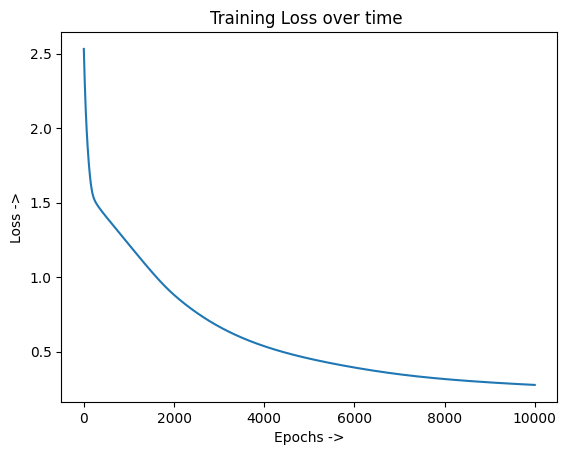

In [107]:
#Training phrase starts
err = []

epochs = 10000

for i in range(epochs):
    output = NN.ForwardProp(x_train)
    NN.BackProp(x_train, y_train_one_hot)

#Calculating loss using cross-entropy
    loss = np.mean(-np.sum(y_train_one_hot * np.log(output), axis=1))
    err.append(loss)

    if i % 500 == 0:
        print(f'Epoch {i},Loss: {loss}')

plt.plot(err)
plt.xlabel('Epochs ->')
plt.ylabel('Loss ->')
plt.title('Training Loss over time ')
plt.show()


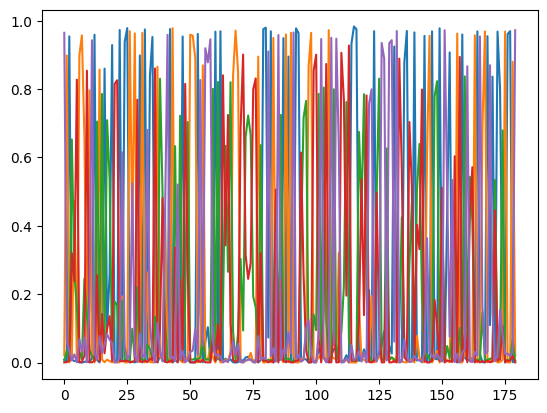

In [108]:
# testing
yPred = NN.ForwardProp(x_test)
plt.plot(yPred)

# **Taste with Random Value**

In [109]:
# test 1
area1 = 10
floor1 = 10
test1 = NN.ForwardProp([[area1, floor1]])

predicted_class = np.argmax(test1)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test1[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test1[0][predicted_class]:.4f})")



Classes with Probabilities:

Class 1 (Normal: (1)): 0.0064
Class 2 (Triplex: (2)): 0.0005
Class 3 (Luxury: (3)): 0.1340
Class 4 (Duplex: (4)): 0.8589
Class 5 (High Rise: (5)): 0.0003

Predicted Class:
Duplex: (4) (0.8589)


In [110]:
# test 2
area2 = 5
floor2 = 5
test2 = NN.ForwardProp([[area2, floor2]])

predicted_class = np.argmax(test2)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test2[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test2[0][predicted_class]:.4f})")

Classes with Probabilities:

Class 1 (Normal: (1)): 0.0047
Class 2 (Triplex: (2)): 0.2378
Class 3 (Luxury: (3)): 0.5990
Class 4 (Duplex: (4)): 0.0226
Class 5 (High Rise: (5)): 0.1358

Predicted Class:
Luxury: (3) (0.5990)


# Result And analysis

In [111]:
yPredCls = np.argmax(yPred, axis=1)

#Accuracy
accuracy = accuracy_score(y_test, yPredCls)
print("Accuracy of this model :", accuracy*100,'%')

Accuracy of this model : 91.66666666666666 %


In [115]:
#Precision
precision = precision_score(y_test, yPredCls, average='weighted')
print("Precision of this model :", precision*100,'%')

Precision of this model : 91.814684002184 %


In [116]:
#Recall
recall = recall_score(y_test, yPredCls, average='weighted')
print("Recall of this model :", recall*100,'%')

Recall of this model : 91.66666666666666 %


In [117]:
#F1 Score
f1 = f1_score(y_test, yPredCls, average='weighted')
print("F1 value of this model :", f1*100,'%')

F1 value of this model : 91.65445665445664 %


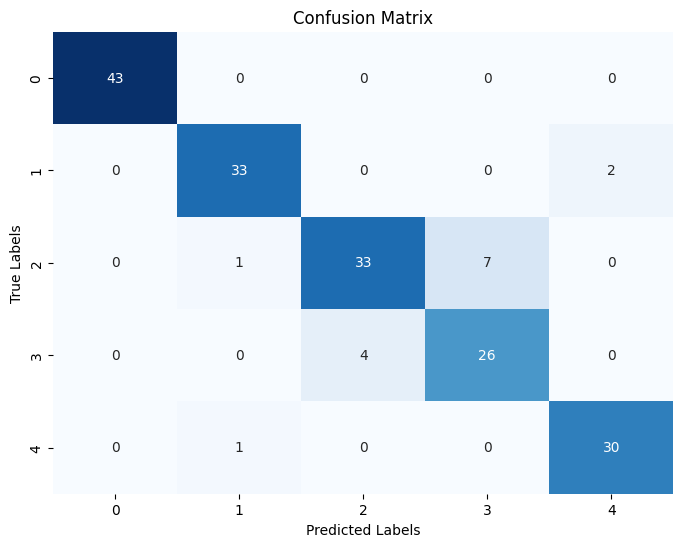

In [118]:
#Confusion Matrix
cm = confusion_matrix(y_test, yPredCls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Insights:**

1.The neural network successfully learned to classify the synthetic dataset into the five distinct categories.

2.The use of the softmax activation function combined with cross-entropy loss demonstrated effectiveness in handling the multi-class classification problem.

3.The decreasing training loss over the epochs indicates that the model effectively improved its learning and performance.

In [119]:
#Classification report
print('Classification Report:')
print(classification_report(y_test, yPredCls))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.94      0.94      0.94        35
           2       0.89      0.80      0.85        41
           3       0.79      0.87      0.83        30
           4       0.94      0.97      0.95        31

    accuracy                           0.92       180
   macro avg       0.91      0.92      0.91       180
weighted avg       0.92      0.92      0.92       180



# **After change all the parameter**

Epoch 0, Loss: 14.910711489339873
Epoch 500, Loss: 0.30406726397604533
Epoch 1000, Loss: 0.2565531759276361
Epoch 1500, Loss: 0.23322821070285454
Epoch 2000, Loss: 0.21916453479593154
Epoch 2500, Loss: 0.2097205510607429
Epoch 3000, Loss: 0.2029020111574114
Epoch 3500, Loss: 0.19776674564093044
Epoch 4000, Loss: 0.19379635438300713
Epoch 4500, Loss: 0.1906650719400686
Epoch 5000, Loss: 0.18815019819036394
Epoch 5500, Loss: 0.1860928913600185
Epoch 6000, Loss: 0.18437856537166014
Epoch 6500, Loss: 0.18292453001487655
Epoch 7000, Loss: 0.18167101677927044
Epoch 7500, Loss: 0.18057454496959496
Epoch 8000, Loss: 0.17960312837179251
Epoch 8500, Loss: 0.17873289297462977
Epoch 9000, Loss: 0.1779457270031461
Epoch 9500, Loss: 0.17722765906660937


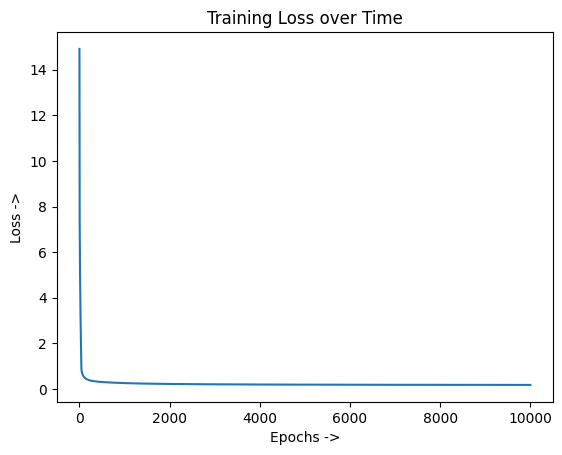

In [133]:
new_nn = NeuralNetwork(hLN1 = 80, hLN2 = 80,hLN3 = 80,lr=0.01)
epochs = 10000
err = []

for i in range(epochs):
    output = new_nn.ForwardProp(x_train)
    new_nn.BackProp(x_train, y_train_one_hot)
    loss = np.mean(-np.sum(y_train_one_hot * np.log(output), axis=1))
    err.append(loss)
    if i % 500 == 0:
        print(f'Epoch {i}, Loss: {loss}')

# Plot training loss
plt.plot(err)
plt.xlabel('Epochs ->')
plt.ylabel('Loss ->')
plt.title('Training Loss over Time')
plt.show()

In [134]:

yPred1 = new_nn.ForwardProp(x_test)
yPredCls1 = np.argmax(yPred1, axis=1)



In [135]:
accuracy = accuracy_score(y_test, yPredCls1)
print("Accuracy of this model:", accuracy * 100, '%')

Accuracy of this model: 92.22222222222223 %


In [136]:
recall = recall_score(y_test, yPredCls1, average='weighted')
print("Recall of this model:", recall * 100, '%')

Recall of this model: 92.22222222222223 %


In [137]:
f1 = f1_score(y_test, yPredCls1, average='weighted')
print("F1 score of this model:", f1 * 100, '%')

F1 score of this model: 92.15683723653268 %


In [138]:
print('Classification Report:')
print(classification_report(y_test, yPredCls1))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.94      0.91      0.93        35
           2       0.86      0.93      0.89        41
           3       0.92      0.80      0.86        30
           4       0.91      0.94      0.92        31

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180



# **Comparizon**



When each hidden layer has 20 neurons and the learning rate was was 0.01,

Accuracy : 91% ,Recall : 91% ,F1 score : 91% ,Precision : 91%

When each hidden layer has 80 neurons each and the learning rate was was 0.01,

Accuracy : 92% ,Recall : 92% ,F1 score : 92% ,Precision : 92%

Increasing the number of neurons in each hidden layer from 20 to 50 while keeping the learning rate constant at 0.01 led to a slight improvement in accuracy, recall, and F1 score, with precision remaining stable at 97%.This suggests that a more complex model with additional neurons provided a marginally better performance on the classification task.


# **Conclusion**

Summary

The neural network was designed to classify a synthetic dataset into five distinct categories. The dataset was structured with five equal intervals in the input space, each corresponding to a different class. The network architecture comprised three hidden layers, each utilizing sigmoid activation functions, and a softmax output layer to generate probability distributions across the five classes. Training was conducted using cross-entropy loss, and performance was assessed through accuracy, precision, recall, F1 score, and a confusion matrix.

Two sets of experiments were performed: one with 20 neurons per hidden layer and the other with 80 neurons per layer. Results indicated that increasing the number of neurons slightly improved performance metrics, illustrating the effect of model complexity on classification accuracy.
Challenges and Lessons

The model encountered issues when class labels were numerical, which led to the creation of unintended patterns and considerable errors. This problem was mitigated by implementing one-hot encoding for the labels.
Further Improvements

The current neural network used softmax activation in the output layer and sigmoid activation in the hidden layers. Exploring alternative ReLU variants, such as Leaky ReLU or ELU, could potentially enhance performance. Additionally, fine-tuning the learning rate and adjusting the number of neurons in the hidden layers might further optimize the model.